In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sbs

In [17]:
trainDf = pd.read_csv('train.csv').dropna()
testDf = pd.read_csv('test.csv')

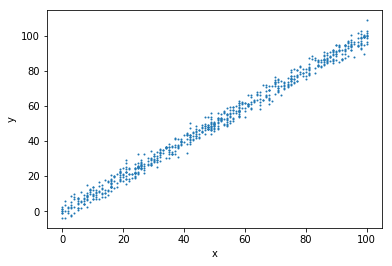

In [18]:
trainDf.plot.scatter('x', 'y', s=1)

In [19]:
sess = tf.Session()

In [20]:
x = tf.placeholder( tf.float64, shape=(1, None), name='x')
y = tf.placeholder( tf.float64, shape=(1, None), name='y')
w = tf.Variable(tf.random_normal((1,1), dtype=tf.float64))
b = tf.Variable(tf.random_normal((1,1), dtype=tf.float64))
y_hat = tf.matmul(w, x) + b
loss = tf.reduce_sum(tf.pow(y_hat - y, 2))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.00000002)
optimizer_node = optimizer.minimize(loss)
initializer = tf.global_variables_initializer()

 # RUNNING THE SESSION 

In [21]:
sess.run(initializer)
w_val, b_val, loss_val = sess.run([w, b, loss], feed_dict = {x: trainDf['x'].values.reshape(1, -1), y: trainDf['y'].values.reshape(1, -1)})
print(w_val, b_val, loss_val)
for _ in range(100):
    sess.run([optimizer_node], feed_dict = {x: trainDf['x'].values.reshape(1, -1), y: trainDf['y'].values.reshape(1, -1)})
    w_val, b_val, loss_val = sess.run([w, b, loss], feed_dict = {x: trainDf['x'].values.reshape(1, -1), y: trainDf['y'].values.reshape(1, -1)})
    print(w_val, b_val, loss_val)

[[1.03798323]] [[-0.14522966]] 8652.985631534746
[[1.03455196]] [[-0.1452808]] 8091.663069086601
[[1.03144107]] [[-0.14532714]] 7630.266412338265
[[1.02862063]] [[-0.14536912]] 7251.00698261771
[[1.02606353]] [[-0.14540716]] 6939.26281849884
[[1.02374518]] [[-0.14544162]] 6683.014940950811
[[1.02164329]] [[-0.14547284]] 6472.383973825964
[[1.01973765]] [[-0.14550112]] 6299.24925456095
[[1.01800994]] [[-0.14552674]] 6156.935750291013
[[1.01644353]] [[-0.14554994]] 6039.956708747175
[[1.01502339]] [[-0.14557094]] 5943.80212210307
[[1.01373583]] [[-0.14558996]] 5864.764848210364
[[1.0125685]] [[-0.14560718]] 5799.797685503741
[[1.01151015]] [[-0.14562277]] 5746.3958912439175
[[1.01055062]] [[-0.14563687]] 5702.50061370889
[[1.00968068]] [[-0.14564964]] 5666.419515259852
[[1.00889196]] [[-0.14566118]] 5636.761525984844
[[1.00817689]] [[-0.14567162]] 5612.383212413104
[[1.00752858]] [[-0.14568107]] 5592.344693600671
[[1.0069408]] [[-0.1456896]] 5575.873404976472
[[1.0064079]] [[-0.14569732]

# Finding the linear line

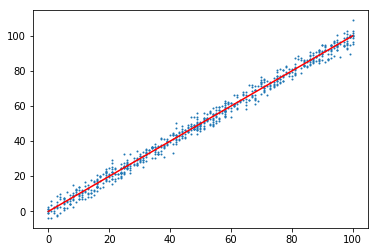

In [24]:
w_val, b_val = sess.run([w, b])
x_sweep = np.linspace(0, 100, 20)
y_sweep = w_val[0] * x_sweep + b_val[0]
plt.scatter(trainDf['x'], trainDf['y'], s=1)
plt.plot(x_sweep, y_sweep, 'r')

In [25]:
w_val, b_val, loss_val = sess.run([w, b, loss], feed_dict = {x: testDf['x'].values.reshape(1, -1), y: testDf['y'].values.reshape(1, -1)})
print(w_val, b_val, loss_val)

[[1.00123503]] [[-0.14575322]] 2827.987245762818
